# **데이터 분석 및 시각화 연습 예제-2**

# <font color="blue">1. NumPy 다차원 배열을 이용한 이미지 시각화</font>

## <font color="green">1-1. 시각화 기본</font>

NumPy 다차원 배열을 이용해 이미지를 표현할 수 있다. 보통 가로, 세로로 구성된 2차원 이미지의 각 픽셀 값들을 2차원 배열에 빗대어서 표현하곤 한다. 여기에 컬러 이미지라면 각 픽셀 당 red, green, blue 3개 채널의 색상 값을 추가로 구성하여 3차원 배열로 표현한다.

---

scipy 패키지의 예제 이미지를 통해 이를 다뤄본다. 아래의 코드를 통해, 다차원 배열로 표현된 예제 이미지를 불러와서 출력할 수 있다.

In [ ]:
from scipy import misc

In [ ]:
img = misc.face()

In [ ]:
print(img)
print(type(img))

In [ ]:
print(img.ndim) # 3차원 배열
print(img.shape) # (768, 1024, 3) => 1024 * 768 해상도를 가지는 컬러 이미지(한 픽셀 당 색상 채널 수 3개)
print(img.dtype)
print(img.min())
print(img.max())

이 데이터는 가로 1024 픽셀, 세로 768 픽셀의 형태를 띄는 이미지를 numpy 다차원 배열로 나타낸 것이다. 또한 red, green, blue 채널의 값은 최소 0부터 최대 255까지 가지며 이를 통해 rgb 방식으로 색상을 표현한다.

---

아래의 코드를 통해 이 이미지를 시각화할 수 있다.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(img)
plt.show()

아래의 코드를 통해 좀 더 구체적으로 시각화해본다.

In [ ]:
plt.figure(figsize=(8, 6))

plt.imshow(img)

plt.title("Sample Image")
plt.xticks([])
plt.yticks([])

plt.show()

예제 이미지 데이터의 red, green, blue 채널을 분리하여 흑백 이미지로 변환해본다.

In [ ]:
# 다차원 배열 인덱싱, 슬라이싱 문법을 이용해서 색상 채널 분리
img_red = img[:, :, 0]
img_green = img[:, :, 1]
img_blue = img[:, :, 2]

In [ ]:
# red 색상 채널만 분리한 이미지 출력
plt.imshow(img_red)
plt.show()

단색 이미지는 matplotlib 설정에 의해 기본 출력 톤이 정해져있다. cmap 키워드 인수를 통해 다른 톤으로 변경할 수 있다.

In [ ]:
# 출력 색상 톤을 지정
plt.imshow(img_red, cmap="Reds")
# plt.imshow(img_green, cmap="Greens")
# plt.imshow(img_blue, cmap="Blues")
plt.show()

아래의 코드를 통해 red, green, blue 색상 채널 값을 동일한 비율로 섞은 단색 이미지 데이터를 만들고 출력해본다.

In [ ]:
img_gray = (img_red + img_green + img_blue) / 3

In [ ]:
plt.imshow(img_gray, cmap="gray")
plt.show()

흑백 이미지를 만들 때 red, green, blue 채널 색상 값을 같은 비율로 섞으면 원본 이미지와 다른 결과물이 생성된다. 연구자들에 의해 경험적으로 터득한 결과에 따라, 단색 이미지를 만들 때는 다음의 비율로 조합하는 게 최적의 결과물을 만들 수 있다.

In [ ]:
img_gray = img_red * 0.2126 + img_green * 0.7152 + img_blue * 0.0722
# img_gray = img @ [0.2126, 0.7152, 0.0722]

In [ ]:
plt.imshow(img_gray, cmap="gray")
plt.show()

## <font color="green">1-2. 데이터 정규화</font>

딥러닝 등 학습을 진행하기 전, 데이터의 범위를 줄이곤 한다. 이를 정규화(Normalization)라고 한다.

---

아래의 코드를 통해, 기존 0부터 255까지 가지던 색상 값을 0부터 1 사이의 값으로 축소할 수 있다.

In [ ]:
# 색상 데이터를 0~1 사이의 값으로 정규화
img_array = img / 255

In [ ]:
print(img_array)
print(type(img_array))

In [ ]:
print(img_array.ndim)
print(img_array.shape)
print(img_array.dtype)
print(img_array.min())
print(img_array.max())

차원 수나 shape는 동일하나, 최소/최대값이 0.0/1.0으로 변경된 걸 확인할 수 있다.

---

다시 red, green, blue 색상 채널로 값들을 분리하고 다시 조합해서 흑백 이미지를 생성해본다.

In [ ]:
red_array = img_array[:, :, 0]
green_array = img_array[:, :, 1]
blue_array = img_array[:, :, 2]

In [ ]:
plt.imshow(red_array, cmap="Reds")
# plt.imshow(green_array, cmap="Greens")
# plt.imshow(blue_array, cmap="Blues")
plt.show()

In [ ]:
gray_array = (red_array + green_array + blue_array) / 3

In [ ]:
plt.imshow(gray_array, cmap="gray")
plt.show()

이번엔 각 색상 채널들을 동일한 비율로 조합해도 원본 이미지와 유사한 결과물을 확인할 수 있다. 정규화를 통해 데이터 오차 범위를 상당히 축소했기 때문이다. 물론 이런 이미지들을 이용해서 학습을 진행할 때는 정확한 비율로 조합하는 게 더 정확한 학습 결과물을 얻을 수 있다.

In [ ]:
gray_array = red_array * 0.2126 + green_array * 0.7152 + blue_array * 0.0722
# gray_array = img_array @ [0.2126, 0.7152, 0.0722]

In [ ]:
plt.imshow(gray_array, cmap="gray")
plt.show()

# <font color="blue">2. 데이터프레임 조작하기 예제</font>

## <font color="green">2-1. 데이터 불러오기</font>

In [1]:
import pandas as pd

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [3]:
# 0번 열을 데이터프레임의 인덱스로 사용하고, 문자열 데이터를 날짜 데이터로 변환
air_quality = pd.read_csv("air_quality_no2.csv", index_col=0, parse_dates=True)

In [ ]:
display(air_quality)

In [ ]:
display(air_quality.describe())

이 데이터는 파리, 안트베르펜, 런던에 각각 위치한 FR04014, BETR801, 런던 웨스트민스터 관측소에서 시간대 별로 측정한 대기 중 이산화질소 수치 데이터이다.

## <font color="green">2-2. 데이터 시각화하기</font>

![image](https://pandas.pydata.org/docs/_images/04_plot_overview.svg)

*   `df.plot()`
*   `df.plot.[그래프명]()`

데이터프레임에서 곧바로 시각화를 진행할 수 있다. `plot()` 함수를 사용하면 가장 기본적인 선도표(line plot)를 그린다. 또는 `plot.[그래프명]()` 함수를 통해 특정 그래프를 지정해서 그릴 수도 있다.

In [ ]:
# 데이터프레임의 모든 데이터를 이용해서 선도표 그리기
air_quality.plot()

각 열 별로 그래프를 나눠서 그린다. 데이터프레임의 인덱스는 x축에, 값은 y축에 표시한다.

In [ ]:
# 파리 관측소에서 측정한 데이터를 이용해서 선도표 그리기
air_quality["station_paris"].plot()

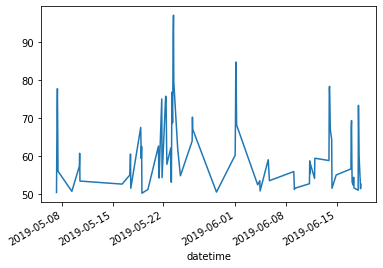

In [4]:
# 파리 관측소에서 측정한 값이 50을 넘는 경우에 대해서,
# 파리 관측소에서 측정한 데이터를 선도표로 그리기


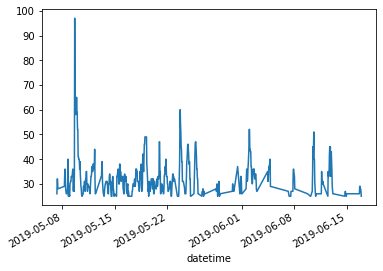

In [5]:
# 런던 관측소에서 측정한 값이 해당 관측소에서 측정한 값의 평균을 넘는 경우에 대해서,
# 런던 관측소에서 측정한 데이터를 선도표로 그리기


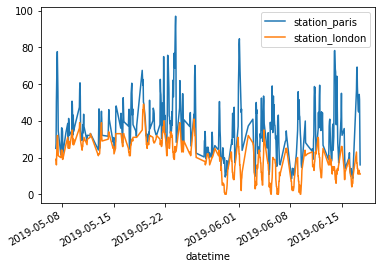

In [6]:
# 파리 관측소에서 측정한 값이 런던 관측소에서 측정한 값보다 큰 경우에 대해서,
# 파리 관측소와 런던 관측소에서 측정한 데이터를 선도표로 그리기


`plot` 속성에서 사용할 수 있는 그래프 관련 함수들은 다음과 같다.

In [ ]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

In [ ]:
# 런던과 파리 관측소에서 측정한 데이터를 이용해서 산점도 그리기
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

In [ ]:
# 런던과 파리 관측소에서 측정한 데이터를 이용해서 육각형 비닝(hexagon binning) 그리기
air_quality.plot.hexbin(x="station_london", y="station_paris", gridsize=20)

In [ ]:
# 2019년 5월 9일 4시에 세 관측소에서 측정한 데이터를 이용해서 막대 그래프 그리기
air_quality["2019-05-09 4:00:00":"2019-05-09 4:00:00"].plot.bar()

In [ ]:
# 2019년 5월 9일 4시에 세 관측소에서 측정한 데이터를 이용해서 수평 막대 그래프 그리기
air_quality["2019-05-09 4:00:00":"2019-05-09 4:00:00"].plot.barh()

In [ ]:
# 2019년 6월 15일 0시부터 3시까지 파리 관측소에서 측정한 데이터를 이용해서 원 그래프 그리기
air_quality.loc["2019-06-15 0:00":"2019-06-15 3:00", "station_paris"].plot.pie()

In [ ]:
# 세 관측소에서 측정한 데이터를 이용해서 히스토그램 그리기
air_quality.plot.hist(bins=50, alpha=0.5)

In [ ]:
# 세 관측소에서 측정한 데이터를 이용해서 상자 수염 그림(box plot) 그리기
air_quality.plot.box()

In [ ]:
# 세 관측소에서 측정한 데이터를 이용해서 영역 그래프(area plot) 그리기
air_quality.plot.area(figsize=(12, 4))

In [ ]:
# 세 관측소에서 측정한 데이터를 이용해서 영역 그래프(area plot) 그리기
air_quality.plot.area(figsize=(12, 4), stacked=False)

In [ ]:
# 세 관측소에서 측정한 데이터를 이용해서 영역 그래프(area plot) 그리기
air_quality.plot.area(figsize=(12, 4), subplots=True)

축 이름을 설정하는 등의 구체적인 시각화 설정은 matplotlib 라이브러리를 사용해야 한다.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 세 관측소 데이터를 이용한 영역 그래프 그리기
fig, axes = plt.subplots(figsize=(15, 6))
air_quality.plot.area(ax=axes)
axes.set_ylabel("NO$_2$ concentration")

plt.show()

## <font color="green">2-3. 새 열 추가하기</font>

![image](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)

*   `df["새 열 이름"] = [추가할 데이터]`

추가할 열의 이름을 입력하여 새 열을 추가할 수 있다.

In [7]:
# 런던의 이산화질소 농도를 mg/m^3 단위로 변환한 열 추가
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882

In [ ]:
display(air_quality.head())

![image](https://pandas.pydata.org/docs/_images/05_newcolumn_2.svg)

In [8]:
# 파리와 안트베르펜의 이산화질소 농도 비율 열 추가
air_quality["ratio_paris_antwerp"] = (
    air_quality["station_paris"] / air_quality["station_antwerp"]
)

In [ ]:
display(air_quality.head())

In [9]:
# 열 이름 변경
aq = air_quality.rename(
    columns={
        "station_antwerp": "BETR801",
        "station_paris": "FR04014",
        "station_london": "London Westminster",
    }
)

In [ ]:
display(aq.head())

In [10]:
# 안트베르펜, 파리, 런던의 이산화질소 농도 합계 열 추가


In [11]:
display(aq.head())

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp,sum
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050,94.5
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556,91.7
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN


In [12]:
# 안트베르펜, 파리, 런던의 이산화질소 농도 평균 열 추가


In [13]:
display(aq.head())

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp,sum,mean
datetime,,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050,94.5,31.500000
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556,91.7,30.566667
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN,NaN,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN,NaN


In [14]:
# 열 이름 변경
aq2 = aq

In [15]:
display(aq2.head())

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp,total,average
datetime,,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050,94.5,31.500000
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556,91.7,30.566667
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN,NaN,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN,NaN


## <font color="green">2-4. 피벗 테이블</font>

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [17]:
air_quality = pd.read_csv(
    "air_quality_long.csv", index_col="date.utc", parse_dates=True
)

In [ ]:
display(air_quality)

city: 관측소가 위치한 도시(Paris, Antwerp, London)

country: 관측소가 위치한 국가(FR, BE, GB)

location: 관측소 ID(FR04014, BETR801, London Westminster)

parameter: 관측소에서 측정한 대상

value: 측정값

unit: 측정 단위(µg/m³)

In [20]:
# 이산화질소 측정 데이터만 추출
no2 = air_quality[air_quality["parameter"] == "no2"]

In [ ]:
# 데이터를 시간 순으로 정렬 후 관측소 ID별로 두 행씩 선택한 부분 집합 생성
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [ ]:
display(no2_subset)

### <font color="red">2-4-1. 피벗 테이블 생성</font>

![image](https://pandas.pydata.org/docs/_images/07_pivot.svg)

*   `df.pivot(columns="열 이름")`

`pivot()` 함수를 사용하면 특정 열을 지정해서 해당 열 안에 있는 값들을 새로운 테이블의 열로 사용하는 데이터프레임을 생성할 수 있다.

In [ ]:
# 관측소 ID 값을 열로 사용하는 새로운 데이터프레임 생성
no2_subset.pivot(columns="location")

In [ ]:
# 관측소 ID 값을 열로 사용하고 측정값만 표시하는 새로운 데이터프레임 생성
no2_subset.pivot(columns="location", values="value")

피벗 테이블에서 시각화를 할 수도 있다.

In [ ]:
no2.pivot(columns="location", values="value").plot()

### <font color="red">2-4-2. 피벗 테이블 통계 적용</font>

![image](https://pandas.pydata.org/docs/_images/07_pivot_table.svg)

피벗 테이블을 생성할 때 통계 수치를 계산해서 적용하기 위해 `pivot_table()` 함수를 사용할 수 있다.

In [ ]:
# 관측소 ID를 인덱스로, 측정 대상을 열로, 측정값의 평균을 표시하는 새로운 데이터프레임 생성
air_quality.pivot_table(
    index="location", columns="parameter", values="value", aggfunc="mean"
)

In [ ]:
# 관측소 ID를 인덱스로, 측정 대상을 열로, 측정값의 평균을 표시하는 새로운 데이터프레임 생성
# 이때, 행, 열 별 종합 수치 또한 표시
air_quality.pivot_table(
    index="location",
    columns="parameter",
    values="value",
    aggfunc="mean",
    margins=True, # 종합 수치 행, 열 추가
)

그룹 함수를 이용해서 또한 유사한 결과를 만들 수 있다.

In [ ]:
# 측정 대상, 관측소 ID별 평균 구하기
air_quality.groupby(["parameter", "location"]).mean()

In [18]:
# 측정 대상을 인덱스로, 관측소가 위치한 국가를 열로, 측정값의 합계를 표시하는 새로운 데이터프레임 생성


country,BE,FR,GB
parameter,,,
no2,4393.0,49231.3,47822.0
pm25,4101.0,NaN,22155.0


In [19]:
# 관측소가 위치한 도시를 인덱스로, 측정 대상을 열로, 측정값의 최소, 최대값을 표시하는 새로운 데이터프레임 생성


min         max      
parameter  no2 pm25    no2  pm25
city                            
Antwerpen  7.5  3.0   74.5  99.0
London     0.0  5.0   97.0  55.0
Paris      0.0  NaN  117.2   NaN

### <font color="red">2-4-3. 피벗 테이블 되돌리기</font>

In [21]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [ ]:
no2_pivoted

![image](https://pandas.pydata.org/docs/_images/07_melt.svg)

*   `df.melt()`

`melt()` 함수를 통해 피벗 테이블을 원래 형태로 되돌릴 수 있다.

In [ ]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

In [ ]:
no_2

In [ ]:
no_2.describe()

In [ ]:
no_2["location"].value_counts()

id_vars 속성에 입력된 열은 melt하지 않는다.

---

value_vars 속성을 통해 melt할 열을 지정할 수도 있다.

In [ ]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    var_name="id_location",
    value_name="NO_2"
)

In [ ]:
no_2

In [ ]:
no_2.describe()

In [ ]:
no_2["id_location"].value_counts()

In [ ]:
# 기존 피벗 테이블 출력
no2_pivoted

In [22]:
# 시간 열을 분해해서 측정 시간 기록 데이터프레임을 만들기


In [23]:
no_2

,name,measure time
0,date.utc,2019-04-09 01:00:00+00:00
1,date.utc,2019-04-09 02:00:00+00:00
2,date.utc,2019-04-09 03:00:00+00:00
3,date.utc,2019-04-09 04:00:00+00:00
4,date.utc,2019-04-09 05:00:00+00:00
...,...,...
1700,date.utc,2019-06-20 20:00:00+00:00
1701,date.utc,2019-06-20 21:00:00+00:00
1702,date.utc,2019-06-20 22:00:00+00:00
1703,date.utc,2019-06-20 23:00:00+00:00


## <font color="green">2-5. 데이터프레임 병합</font>

### <font color="red">2-5-1. 테이블 병합</font>

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [25]:
air_quality_no2 = pd.read_csv("air_quality_no2_long.csv", parse_dates=True)

In [26]:
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

In [ ]:
air_quality_no2

In [27]:
air_quality_pm25 = pd.read_csv("air_quality_pm25_long.csv", parse_dates=True)

In [28]:
air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]

In [ ]:
air_quality_pm25.head()

![image](https://pandas.pydata.org/docs/_images/08_concat_row.svg)

*   `pd.concat([df1, df2, ...])`

두 개 이상의 데이터프레임을 병합할 수 있다. 기본적으로는 행을 추가하는 방향으로 병합을 진행한다.

In [29]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2])

In [ ]:
air_quality

In [ ]:
print("air_quality_pm25.shape:", air_quality_pm25.shape)
print("air_quality_no2.shape:", air_quality_no2.shape)
print("air_quality.shape:", air_quality.shape)

In [30]:
air_quality = air_quality.sort_values("date.utc")

In [ ]:
air_quality

keys 키워드 인수를 통해 추가 인덱스를 부여할 수 있다.

In [ ]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

In [ ]:
air_quality_

### <font color="red">2-5-2. 테이블 조인</font>

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [ ]:
stations_coord = pd.read_csv("air_quality_stations.csv")

In [ ]:
stations_coord

In [ ]:
air_quality

![image](https://pandas.pydata.org/docs/_images/08_merge_left.svg)

*   `pd.merge(df1, df2)`

두 개의 데이터프레임을 데이터베이스 스타일로 병합할 수 있다. 데이터베이스에서 두 개의 테이블을 조인하는 것처럼 다양한 방식의 조인을 지원한다.

In [ ]:
# on: 병합할 때 사용할 key 열의 이름. 두 테이블 모두 같은 이름을 가진 열을 가져야 한다.
# how: 병합 방법. left, right, outer, inner, cross 값을 입력할 수 있다. 기본 값 inner.
air_quality_merge = pd.merge(left=air_quality, right=stations_coord, on="location", how="left")

In [ ]:
air_quality_merge

In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [ ]:
stations_coord_re = pd.read_csv("air_quality_stations_re.csv")

In [ ]:
# left_on: 병합할 때 사용할 왼쪽 테이블의 key 열의 이름.
# right_on: 병합할 때 사용할 오른쪽 테이블의 key 열의 이름.
air_quality_merge_re = pd.merge(
    left=air_quality, right=stations_coord_re,
    left_on="location", right_on="id",
    how="left")

In [ ]:
air_quality_merge_re



---



In [ ]:
# colab에서 파일을 업로드하려면 아래의 코드를 사용
from google.colab import files
uploaded = files.upload()

In [32]:
air_quality_parameters = pd.read_csv("air_quality_parameters.csv")

In [33]:
# 하단의 출력 결과와 일치하는 테이블 조인 코드 만들기
air_quality_mg = None

In [34]:
air_quality_mg

,id,description,name,date.utc,location,parameter,value
0,no2,Nitrogen Dioxide,NO2,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1,no2,Nitrogen Dioxide,NO2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
2,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
3,no2,Nitrogen Dioxide,NO2,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
4,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
...,...,...,...,...,...,...,...
3173,no2,Nitrogen Dioxide,NO2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3174,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0
3175,no2,Nitrogen Dioxide,NO2,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
3176,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0
